## Assignment-1(i) K Means with 2 clusters

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
random.seed(10)
sns.set(style="white", color_codes=True)
%matplotlib inline

### Loading datasets

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assg-1/cancer.csv')
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### K means Algorithm implementation

In [5]:
class kmeans:
    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandom centroids:")
            print(self.centroids)

        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Copying old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                self.clusters[row_i] = np.argmin(distances)
            for cls in range(0, self.n_clusters):

                cls_index = np.where(self.clusters == cls)[0]

                if len(cls_index) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    self.centroids.loc[cls] = self.data.iloc[cls_index].mean()
                    
                if self.verbose:
                    print("\nCluster number {}: [n={}]".format(cls, len(cls_index)))
                    print(cls_index)

            if self.verbose:
                print("\nPrevious centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

## Applying k means for two clusters(Number of clusters = 2)

In [6]:
km = kmeans(n_clusters=2)
km.train(df=df, verbose=True)


Random centroids:
   diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0          0        14.34  ...          0.3062                  0.06072
1          0        10.29  ...          0.2226                  0.08283

[2 rows x 31 columns]

Cluster number 0: [n=337]
[  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  42  43  44  45  47  49  51  53  54  56  57  58  62  64  65  70
  72  73  75  76  77  78  79  81  82  83  85  86  87  89  90  91  92  93
  94  95  99 100 105 108 112 117 118 119 121 122 123 124 125 126 127 128
 129 131 132 133 134 135 138 141 143 147 148 149 150 154 156 157 161 162
 164 165 167 168 169 171 172 177 178 180 181 182 184 186 190 193 194 195
 196 197 198 199 200 201 202 203 204 205 207 208 209 210 212 213 214 215
 218 219 220 221 223 224 225 227 228 229 230 233 235 236 237 238 239 240
 243 244 246 247 250 252 253 254 255 256 257 258 259 260 2

In [7]:
#Storing information
df['cluster'] = km.clusters
centroids = km.centroids
centroids['cluster'] = 'centroid'
df_for_plot = pd.concat([df, centroids])

### Number of points in the clusters=438,131


### Plotting the results

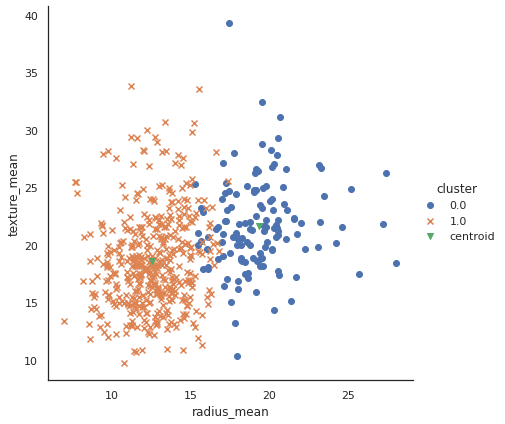

In [9]:
sns.FacetGrid(df_for_plot, hue="cluster", height=6, hue_kws={"marker":["o", "x", "v", "x"]}).map(plt.scatter, "radius_mean", "texture_mean").add_legend()